In [1]:
train = pd.read_csv('train.csv')

In [2]:
train.shape

(1460, 81)

In [3]:
train.isnull().values.any()

True

In [4]:
missing_features = train.columns[train.isnull().sum() > 0]

In [5]:
float_feats = train.select_dtypes(include=['float64']).columns

In [6]:
cat_feats = train.select_dtypes(include=['object']).columns

In [7]:
int_feats = train.select_dtypes(include=['int64']).columns

In [8]:
def create_bool_feature(df,col,val,val0,val1):
    df[col+'_bool'] = [val0 if row[col] == val else val1 for i, row in df.iterrows()]
    return df

In [9]:
train = create_bool_feature(train,'MiscVal',0,0,1)

In [10]:
train = create_bool_feature(train,'PoolArea',0,0,1)

In [11]:
train = create_bool_feature(train,'ScreenPorch',0,0,1)

In [12]:
train = create_bool_feature(train,'3SsnPorch',0,0,1)

In [13]:
train = create_bool_feature(train,'OpenPorchSF',0,0,1)

In [14]:
train = create_bool_feature(train,'WoodDeckSF',0,0,1)

In [15]:
train = create_bool_feature(train,'GarageArea',0,0,1)

In [16]:
train['GarageCars'] = [str(row.GarageCars) for i,row in train.iterrows()]

In [17]:
train['Fireplaces'] = [str(row.Fireplaces) for i,row in train.iterrows()]

In [18]:
train['TotRmsAbvGrd'] = [str(row.TotRmsAbvGrd) for i,row in train.iterrows()]

In [19]:
train = create_bool_feature(train,'KitchenAbvGr',0,0,1)

In [20]:
train['BedroomAbvGr'] = [str(row.BedroomAbvGr) for i,row in train.iterrows()]

In [21]:
train['HalfBath'] = [str(row.HalfBath) for i,row in train.iterrows()]

In [22]:
train['FullBath'] = [str(row.FullBath) for i, row in train.iterrows()]

In [23]:
train['BsmtHalfBath'] = [str(row.BsmtHalfBath) for i,row in train.iterrows()]

In [24]:
train['BsmtFullBath'] = [str(row.BsmtFullBath) for i, row in train.iterrows()]

In [25]:
train['OverallCond'] = [str(row.OverallCond) for i,row in train.iterrows()]

In [26]:
train['OverallQual'] = [str(row.OverallQual) for i,row in train.iterrows()]

In [27]:
train['MSSubClass'] = [str(row.MSSubClass) for i,row in train.iterrows()]

In [28]:
train['GarageYrBlt'] = [str(row.GarageYrBlt) for i,row in train.iterrows()]

In [29]:
train = create_bool_feature(train,'MasVnrArea',0,0,1)

In [30]:
for col in ['MiscVal_bool', u'PoolArea_bool', u'ScreenPorch_bool',
       u'3SsnPorch_bool', u'OpenPorchSF_bool', u'WoodDeckSF_bool',
       u'GarageArea_bool', u'KitchenAbvGr_bool', u'MasVnrArea_bool']:
    train[col] = [str(row[col]) for i,row in train.iterrows()]

In [31]:
train = create_bool_feature(train,'EnclosedPorch',0,0,1)
train = create_bool_feature(train,'LowQualFinSF',0,0,1)
train = create_bool_feature(train,'2ndFlrSF',0,0,1)
train = create_bool_feature(train,'BsmtFinSF2',0,0,1)
train = create_bool_feature(train,'BsmtFinSF1',0,0,1)

In [32]:
train['YrSold'] = [str(row.YrSold) for i,row in train.iterrows()]
train['MoSold'] = [str(row.MoSold) for i,row in train.iterrows()]
train['YearRemodAdd'] = [str(row.YearRemodAdd) for i,row in train.iterrows()]
train['YearBuilt'] = [str(row.YearBuilt) for i,row in train.iterrows()]

In [33]:
for col in ['EnclosedPorch_bool', u'LowQualFinSF_bool',
       u'2ndFlrSF_bool', u'BsmtFinSF2_bool', u'BsmtFinSF1_bool']:
    train[col] = [str(row[col]) for i,row in train.iterrows()]

In [34]:
bool_feats = [col.split('_')[0] for col in train.select_dtypes('object').columns if 'bool' in col ]

In [35]:
real_bool_feats = [col for col in list(train.select_dtypes('int').columns) + list(train.select_dtypes('float').columns) if col in bool_feats]

In [36]:
cat_feats = [col for col in train.select_dtypes('object').columns if col not in bool_feats]

In [37]:
real_feats = [col for col in list(train.select_dtypes('int').columns) + list(train.select_dtypes('float').columns) if col not in bool_feats]

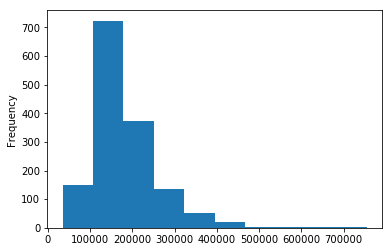

In [38]:
train.SalePrice.plot(kind='hist')

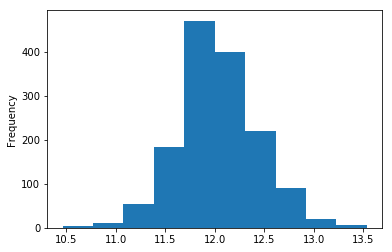

In [39]:
np.log(train.SalePrice).plot(kind='hist')

In [40]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OpenPorchSF_bool,WoodDeckSF_bool,GarageArea_bool,KitchenAbvGr_bool,MasVnrArea_bool,EnclosedPorch_bool,LowQualFinSF_bool,2ndFlrSF_bool,BsmtFinSF2_bool,BsmtFinSF1_bool
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,1,1,0,0,1,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,1,1,1,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,1,1,1,0,0,1,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,0,1,1,0,1,0,1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,1,1,1,1,0,0,1,0,1


In [41]:
missing_features

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [44]:
train[missing_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt        0
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [45]:
[col for col in missing_features if col in bool_feats]

['MasVnrArea']

In [46]:
[col for col in missing_features if col in real_bool_feats]

['MasVnrArea']

In [47]:
[col for col in missing_features if col in cat_feats]

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']